In [1]:
from visualization import draw
from IPython.display import HTML
from tqdm.notebook import tqdm

In [2]:
from agent import Agent
from high_level_policy import HCBS
from map_handler import Map, read_map, read_tasks
from node import GridNode
from low_level_policy import manhattan_distance


In [22]:
height = 15
width = 30
mapstr = '''
# . . # 
. . . .  
. . . . 
# . . # 
'''
agent1 = Agent(0, 1, 3, 2)
agent2 = Agent(1, 0, 2, 3)

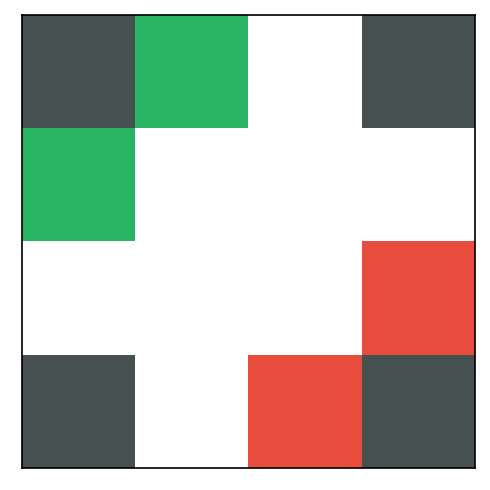

In [23]:
test_map = Map()
test_map.read_from_string(mapstr, 4, 4)
draw(test_map, [agent1, agent2])

In [24]:
def test(SearchFunction, height, width, mapstr, agents, use_pc=False, diagonal_movements=False, draw_anim=False, **kwargs):
    task_map = Map()
    task_map.read_from_string(mapstr, width, height, diagonal_movements=diagonal_movements)

    solution = SearchFunction(task_map, agents, use_pc, **kwargs)
    if draw_anim:
        anim = draw(task_map, agents, solution)
        return solution, anim
    return solution

In [25]:
# def SimpleTest(SearchFunction, height, width, mapstr, agents, **kwargs):
#     task_map = Map()
#     task_map.read_from_string(mapstr, width, height, diagonal_movements=False)

#     solution = SearchFunction(task_map, agents, **kwargs)
#     anim = draw(task_map, agents, solution)
#     return anim

In [26]:
# def SimpleTestWithoutDrawing(SearchFunction, height, width, mapstr, agents, **kwargs):
#     task_map = Map()
#     task_map.read_from_string(mapstr, width, height, diagonal_movements=False)

#     solution = SearchFunction(task_map, agents, **kwargs)
#     return solution


# Sanity check of conflict prioritization

Solution was found, cost =  9


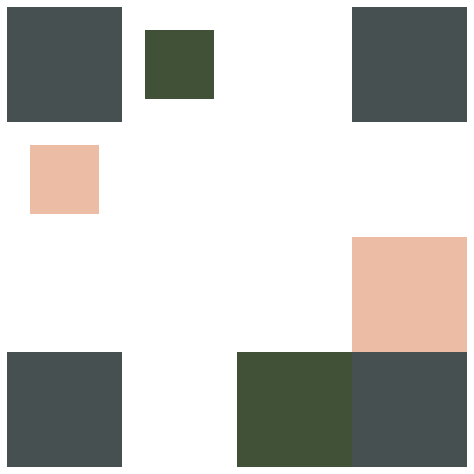

In [27]:
solution, anim = test(HCBS, 4, 4, mapstr, [agent1, agent2], heuristic_function=manhattan_distance, use_pc=True, draw_anim=True)

In [28]:
HTML(anim.to_html5_video())

In [9]:
mapstr = read_map('./brc202d.map/brc202d.map')
num = 2
tasks = read_tasks('./brc202d.map-scen-random/scen-random/brc202d-random-1.scen')[:num] # tasks is a list of lists
Agent.id=0
agents = []
for i in range(num):
    bucket, path, map_width, map_height, jStart, iStart, jGoal, iGoal, length = tasks[i]
    agents += [Agent(iStart, jStart, iGoal, jGoal)]

In [10]:
%%time
# 2 agents
solution = test(HCBS, map_height, map_width, mapstr, agents, heuristic_function=manhattan_distance, use_pc=True)

Wall time: 15.8 s


# Without conflict prioritization

Solution was found, cost =  9


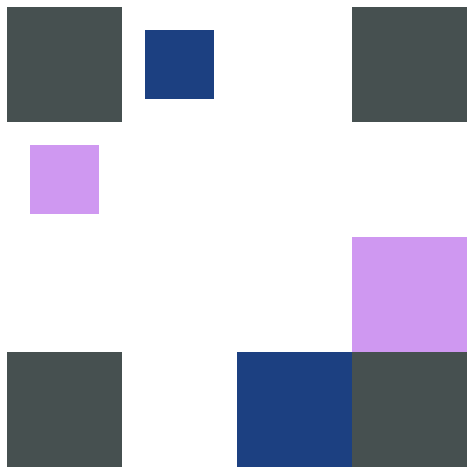

In [11]:
height = 15
width = 30
mapstr = '''
# . . # 
. . . .  
. . . . 
# . . # 
'''
agent1 = Agent(0, 1, 3, 2)
agent2 = Agent(1, 0, 2, 3)

solution, anim = test(HCBS, 4, 4, mapstr, [agent1, agent2], heuristic_function=manhattan_distance, draw_anim=True)

In [12]:
HTML(anim.to_html5_video())

In [13]:
mapstr = read_map('./brc202d.map/brc202d.map')

In [14]:
num = 2 # number of agents

In [15]:
tasks = read_tasks('./brc202d.map-scen-random/scen-random/brc202d-random-1.scen')[:num] # tasks is a list of lists

In [16]:
Agent.id=0
agents = []
for i in range(num):
    bucket, path, map_width, map_height, jStart, iStart, jGoal, iGoal, length = tasks[i]
    agents += [Agent(iStart, jStart, iGoal, jGoal)]

In [17]:
%%time
# 2 agents
anim = test(HCBS, map_height, map_width, mapstr, agents, heuristic_function=manhattan_distance)


NameError: name 'SimpleTest' is not defined

In [18]:
HTML(anim.to_html5_video())

In [21]:
%%time
# 2 agents
solution = test(HCBS, map_height, map_width, mapstr, agents, heuristic_function=manhattan_distance)

Wall time: 15.7 s


In [20]:
sum([el[1] for el in solution.values()])

9